<a href="https://colab.research.google.com/github/jacelyntan880-os/jacelyn-2331055/blob/main/Fuel_Efficiency_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
cols = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
df = pd.read_csv(url, names=cols, na_values='?', comment='\t', sep='\s+', skipinitialspace=True)
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2237178679.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(url, names=cols, na_values='?', comment='\t', sep='\s+', skipinitialspace=True)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
print("Initial shape:", df.shape)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
print("Missing per column:\n", df.isna().sum())
df = df.dropna().reset_index(drop=True)
print("After dropna shape:", df.shape)
df.describe().round(3)

Initial shape: (398, 9)
Missing per column:
 mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64
After dropna shape: (392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000
mean,23.446,5.472,194.412,104.469,2977.584,15.541,75.980,1.577
std,7.805,1.706,104.644,38.491,849.403,2.759,3.684,0.806
min,9.000,3.000,68.000,46.000,1613.000,8.000,70.000,1.000
25%,17.000,4.000,105.000,75.000,2225.250,13.775,73.000,1.000
50%,22.750,4.000,151.000,93.500,2803.500,15.500,76.000,1.000
75%,29.000,8.000,275.750,126.000,3614.750,17.025,79.000,2.000
max,46.600,8.000,455.000,230.000,5140.000,24.800,82.000,3.000


In [4]:
df = pd.get_dummies(df, columns=['origin'], prefix='origin', drop_first=True)  # drop_first to avoid collinear
X = df.drop(['mpg','car_name'], axis=1)
y = df['mpg']
print("Features used:", list(X.columns))

Features used: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin_2', 'origin_3']


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (313, 8) Test shape: (79, 8)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [8]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R^2: {r2:.3f}")

MAE: 2.462
MSE: 10.602
RMSE: 3.256
R^2: 0.792


In [9]:
feature_names = X.columns
coefs = model.coef_
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefs})
coef_df['abscoef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values(by='abscoef', ascending=False).drop(columns=['abscoef'])
coef_df.style.background_gradient(subset=['coefficient'])

,feature,coefficient
3,weight,-5.448473
5,model_year,2.932785
1,displacement,2.007223
7,origin_3,1.286053
6,origin_2,1.088815
2,horsepower,-0.831132
0,cylinders,-0.582806
4,acceleration,0.116270


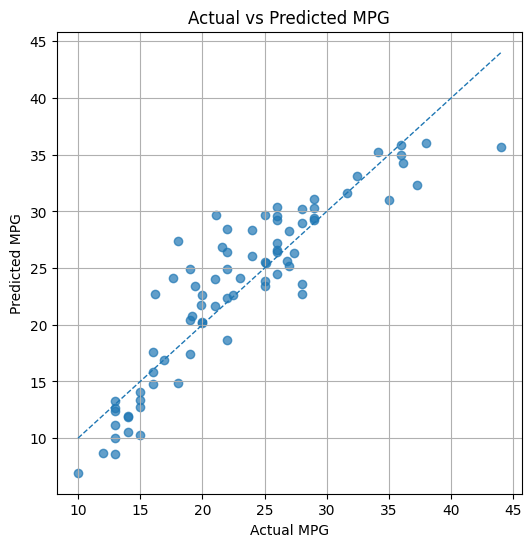

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', linewidth=1)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.grid(True)
plt.show()

In [11]:
print("\nInterpretation:")
print("- Features with large negative coefficients (e.g., weight, displacement, horsepower) reduce MPG.")
print("- R^2 indicates the proportion of variance explained by the linear model.")
print("- If R^2 is low (< ~0.7) consider non-linear models (Random Forest, Gradient Boosting) or feature engineering.")


Interpretation:
- Features with large negative coefficients (e.g., weight, displacement, horsepower) reduce MPG.
- R^2 indicates the proportion of variance explained by the linear model.
- If R^2 is low (< ~0.7) consider non-linear models (Random Forest, Gradient Boosting) or feature engineering.


In [12]:
coef_df.to_csv("linear_regression_coefficients.csv", index=False)
print("Saved coefficients to linear_regression_coefficients.csv")

Saved coefficients to linear_regression_coefficients.csv
